In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("C:/Users/Asus/Downloads/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing =df.isnull().sum().sort_values(ascending=False)

In [7]:
# All the missing columns seems to have a NA value which means not available, hence none of the columns have missing values except for 
# Lotfrontage which is a numerical value

missing[missing>0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# Filling the missing values with mean or median for numerical columns

In [9]:
df["LotFrontage"].mean()

70.04995836802665

In [10]:
df["LotFrontage"].median()

69.0

In [11]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

In [12]:
df["LotFrontage"].isna().sum()

0

In [13]:
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

Remove categorical attributes that have more than 85% data associated to one value.

In [14]:
def g():
    column = []
    cat_col = df.select_dtypes(include=['object'])
    for col in (cat_col):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = g()

# Remove the columns with skewed data

df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,NaN,Reg,Inside,CollgCr,1Fam,...,0,0,NaN,NaN,NaN,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,NaN,Reg,FR2,Veenker,1Fam,...,0,0,NaN,NaN,NaN,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,NaN,IR1,Inside,CollgCr,1Fam,...,0,0,NaN,NaN,NaN,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,NaN,IR1,Corner,Crawfor,1Fam,...,0,0,NaN,NaN,NaN,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,NaN,IR1,FR2,NoRidge,1Fam,...,0,0,NaN,NaN,NaN,0,12,2008,Normal,250000


In [15]:
df.dropna(axis= 0, inplace=True, subset =["GarageYrBlt"])

In [16]:
# As none of the columns left have missing value hence replacing the value "None" instead of NA

In [17]:
nullcols = df.columns[df.isna().any()]

In [18]:
for i in nullcols:
    df[i].fillna("None", inplace= True)

In [19]:
# getting the age of the building and garage 

In [20]:
df.ageofbuilding = pd.datetime.now().year- df.YearBuilt

In [21]:
df.ageofgarrage= pd.datetime.now().year- df.GarageYrBlt

In [22]:
# dropping the columns no longer required

In [23]:
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)

In [24]:
df.shape

(1379, 59)

# Univariate Analysis

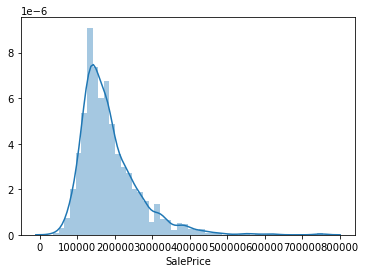

In [25]:
sns.distplot(df["SalePrice"])

In [26]:
df['SalePrice'] = np.log1p(df['SalePrice'])

The price data is skewed towards the left and as the price column is skewed taking a log to normalize the data

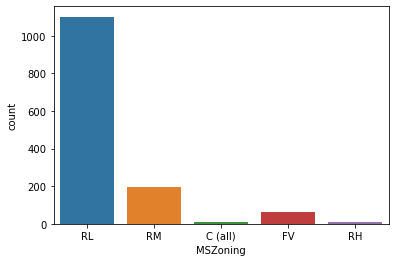

In [27]:
sns.countplot(df["MSZoning"])

Most of the properties are part of Residential Low Density

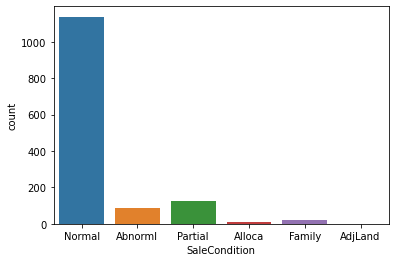

In [28]:
sns.countplot(df["SaleCondition"])

Condition of sale is mostly Normal

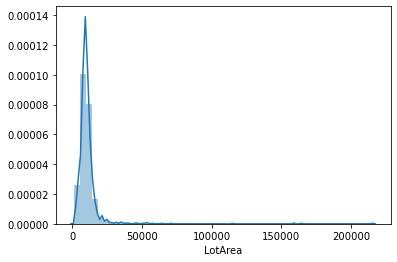

In [29]:
sns.distplot(df["LotArea"])

The lot size mainly lie under 30000 square feet

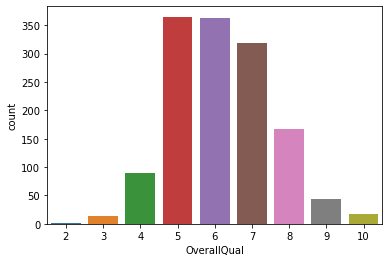

In [30]:
sns.countplot(df["OverallQual"])

Majority of the properties quality lie average and Good

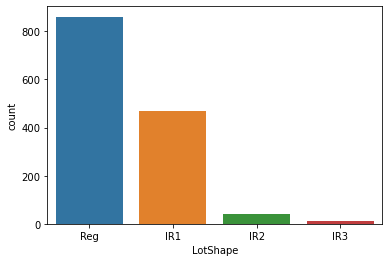

In [31]:
sns.countplot(df["LotShape"])

Lot shapes are mostly regular or slightly irregular

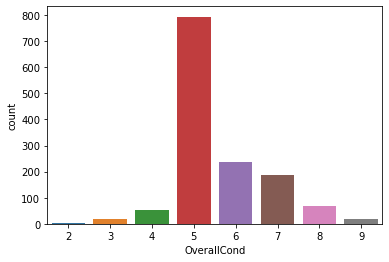

In [32]:
sns.countplot(df["OverallCond"])

Most of the properties has overall condition as average

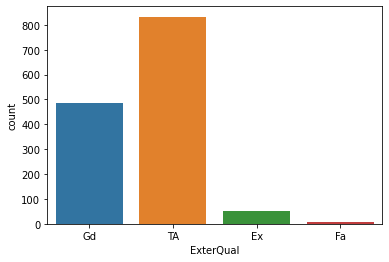

In [33]:
sns.countplot(df["ExterQual"])

Majority of the properties exterior quality is average

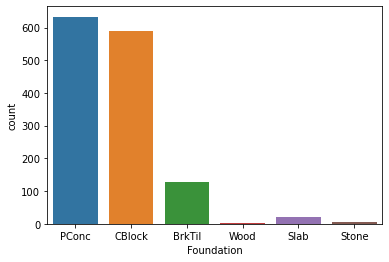

In [34]:
sns.countplot(df["Foundation"])

The foundation of most of the properties is either of Poured Contrete or Cinder Block

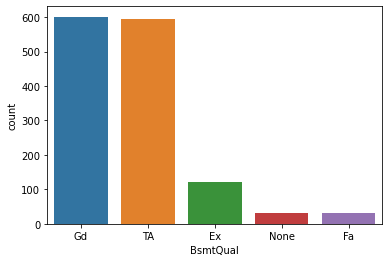

In [35]:
sns.countplot(df["BsmtQual"])

The height of the basement for most of the properties is either Typical or Good 

# Bi-variate Analysis

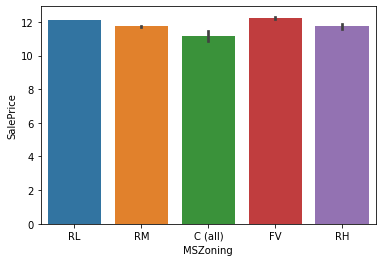

In [36]:
sns.barplot(x= "MSZoning",data= df, y = "SalePrice")

Floating Village Residential zone has higher prices than other zones

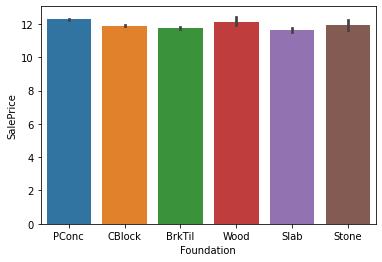

In [37]:
sns.barplot(x= "Foundation",data= df, y = "SalePrice")

Poured Contrete foundation properties have the highest sales prices

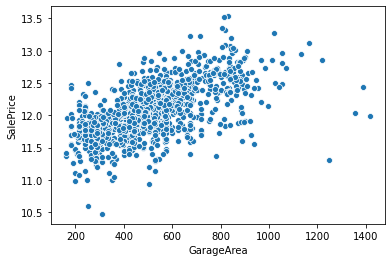

In [38]:
sns.scatterplot(df.GarageArea, df.SalePrice)

As the area of garage increases the price of property increases as well

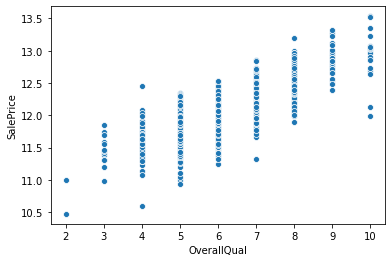

In [39]:
sns.scatterplot(df.OverallQual, df.SalePrice)

As Quality increases price increase as well

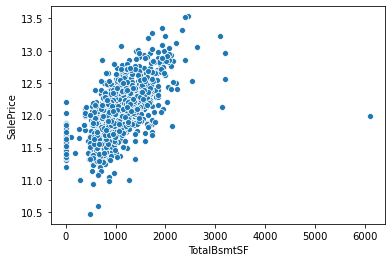

In [40]:
sns.scatterplot(df.TotalBsmtSF, df.SalePrice)

As the area of basement increases the price increases as well

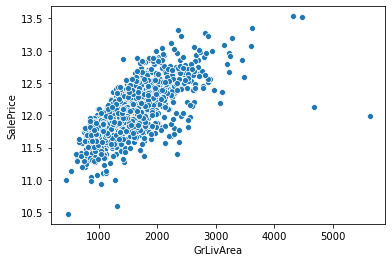

In [41]:
sns.scatterplot(df.GrLivArea, df.SalePrice)

Price has a linear positive correlation with above ground living area in sq. ft.

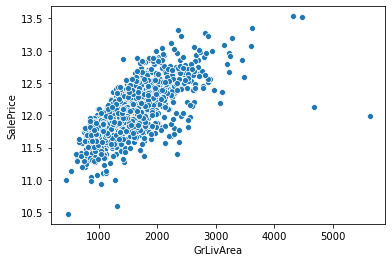

In [42]:
sns.scatterplot(df.GrLivArea, df.SalePrice)

As the area above ground increases the prices increases as well

In [43]:
corr= df.corr()

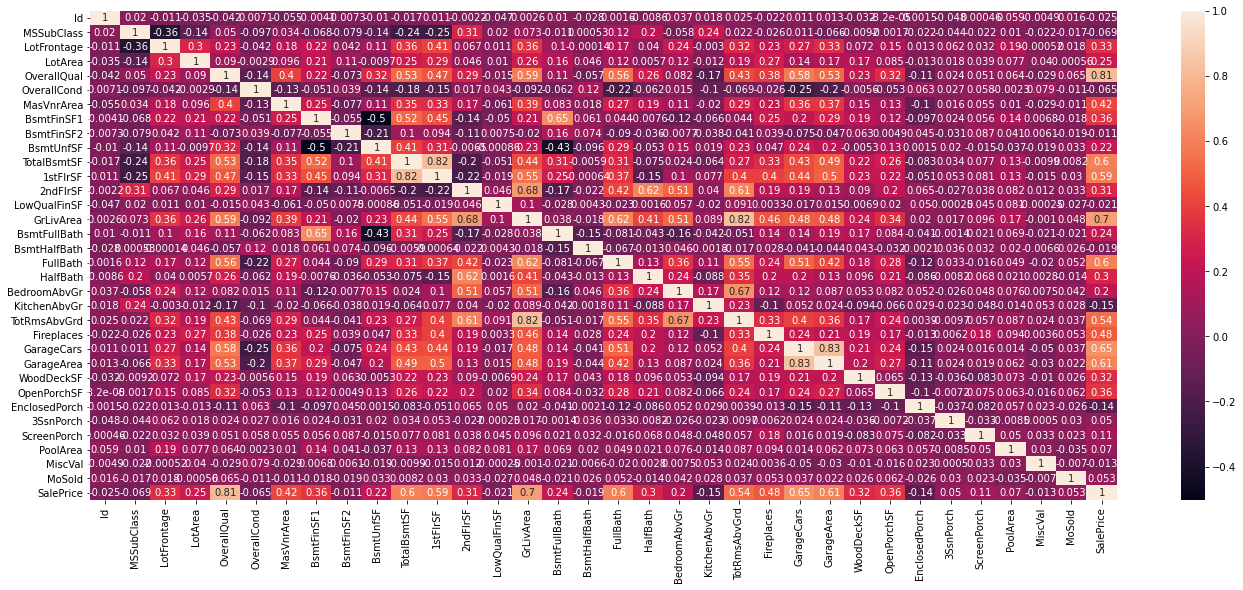

In [44]:
f, ax = plt.subplots(figsize=(23,9))
sns.heatmap(corr, annot=True)

Overall Quality has the highest correlation with sales price followed by Grlivarea, Garagecars, Garagearea, TotalbsmtSF

In [45]:
k=10

cols = corr.nlargest(k,"SalePrice")["SalePrice"].index

In [46]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', 'FullBath', '1stFlrSF', 'TotRmsAbvGrd', 'Fireplaces'],
      dtype='object')

In [47]:
cm= np.corrcoef(df[cols].values.T)

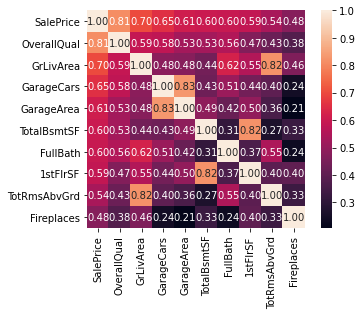

In [48]:
hm = sns.heatmap(cm, cbar=True, annot=True, square= True, fmt='.2f', annot_kws={'size':10}, yticklabels= cols.values, xticklabels=cols.values)

# Outliers

In [49]:
df.quantile([.25, .5, .75, .90, .95,.99,1], axis = 0)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0.25,366.50,20.0,60.000000,7741.0,5.0,5.0,0.0,0.00,0.00,228.0,...,380.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,5.0,11.805603
0.50,734.00,50.0,70.049958,9591.0,6.0,5.0,0.0,400.00,0.00,476.0,...,484.00,0.00,27.00,0.0,0.0,0.00,0.0,0.0,6.0,12.028745
0.75,1094.50,70.0,79.000000,11708.5,7.0,6.0,170.5,732.00,0.00,811.0,...,580.00,171.00,69.50,0.0,0.0,0.00,0.0,0.0,8.0,12.291107
0.90,1313.20,120.0,92.200000,14574.6,8.0,7.0,338.4,1079.60,125.40,1237.6,...,770.40,264.00,130.00,108.0,0.0,0.00,0.0,0.0,10.0,12.548083
0.95,1387.10,160.0,104.100000,17506.9,8.0,8.0,459.5,1277.30,401.10,1471.0,...,856.10,340.20,172.20,180.3,0.0,165.30,0.0,0.0,11.0,12.721889
0.99,1443.22,190.0,134.660000,39321.8,10.0,9.0,800.4,1580.26,847.16,1796.1,...,1015.32,509.44,282.66,260.1,168.0,271.44,0.0,700.0,12.0,13.011448
1.00,1460.00,190.0,313.000000,215245.0,10.0,9.0,1600.0,5644.00,1474.00,2336.0,...,1418.00,857.00,547.00,552.0,508.0,480.00,738.0,15500.0,12.0,13.534474


In [50]:
df.shape

(1379, 59)

In [51]:
# removing the outliers

In [52]:
numcols= df.select_dtypes(exclude= "object")

In [53]:
def outlier(x):
    list=[]
    for i in numcols:
        Q1= x[i].quantile(0.25)
        Q3 = x[i].quantile(0.99)
        IQR= Q3-Q1
        x = x[(x[i]>= (Q1 - (1.5*IQR))) & (x[i]<= (Q3 + (1.5*IQR)))]
    return x

In [54]:
df= outlier(df)

In [55]:
df.shape

(1350, 59)

# Dummy Variables

In [56]:
cat= df.select_dtypes(include="object")

In [57]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,BldgType,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,None,Reg,Inside,CollgCr,1Fam,...,0,0,0,None,None,None,0,2,Normal,12.247699
1,2,20,RL,80.0,9600,None,Reg,FR2,Veenker,1Fam,...,0,0,0,None,None,None,0,5,Normal,12.109016
2,3,60,RL,68.0,11250,None,IR1,Inside,CollgCr,1Fam,...,0,0,0,None,None,None,0,9,Normal,12.317171
3,4,70,RL,60.0,9550,None,IR1,Corner,Crawfor,1Fam,...,0,0,0,None,None,None,0,2,Abnorml,11.849405
4,5,60,RL,84.0,14260,None,IR1,FR2,NoRidge,1Fam,...,0,0,0,None,None,None,0,12,Normal,12.429220


Converting categorical cols to numerical, where values are ordinal

In [58]:
df["n_ExterQual"]= df["ExterQual"].map({ "Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
df["n_BsmtQual"]= df["BsmtQual"].map({ "Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0})
df["n_HeatingQC"]= df["HeatingQC"].map({ "Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
df["n_KitchenQual"]= df["KitchenQual"].map({ "Ex":4,"Gd":3,"TA":2,"Fa":1,"Po":0})
df["n_FireplaceQu"]= df["FireplaceQu"].map({ "Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"None":0})
df["n_PoolQC"]= df["PoolQC"].map({ "Ex":4,"Gd":3,"TA":2,"Fa":1,"None":0})

In [59]:
df.drop(["ExterQual","BsmtQual","HeatingQC","KitchenQual","FireplaceQu", "PoolQC"], axis=1, inplace=True)

In [60]:
# Creating dummy variables

In [61]:
cat_col= ['MSZoning', 'Alley', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'GarageType',
       'GarageFinish', 'Fence', 'MiscFeature', 'SaleCondition']

In [62]:
for i in cat_col:
    dummies= pd.get_dummies(df[i], drop_first=True)
    dummies= dummies.add_prefix((f'{i}_'))
    df = pd.concat([df, dummies], axis = 1)
    df.drop([i], axis = 1, inplace = True) 

In [63]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,0,0,1,0,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,0,0,1,0,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,0,0,1,0,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,0,0,1,0,0,0,0,0,0,0
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,0,0,1,0,0,0,0,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1459
Columns: 157 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(37), uint8(117)
memory usage: 586.7 KB


In [65]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,732.317037,56.022222,70.009030,10158.613333,6.182222,5.568148,108.876296,450.177778,46.854074,572.425185,...,0.104444,0.008148,0.811852,0.000741,0.029630,0.000741,0.007407,0.014815,0.823704,0.090370
std,420.244715,41.162584,19.550328,5519.367037,1.339698,1.070956,184.027789,436.014946,162.884812,445.307633,...,0.305950,0.089932,0.390975,0.027217,0.169626,0.027217,0.085779,0.120856,0.381213,0.286818
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,370.250000,20.000000,60.000000,7700.000000,5.000000,5.000000,0.000000,0.000000,0.000000,230.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,735.500000,50.000000,70.049958,9565.500000,6.000000,5.000000,0.000000,399.500000,0.000000,479.500000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1093.750000,70.000000,79.000000,11642.000000,7.000000,6.000000,171.750000,731.750000,0.000000,812.750000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,182.000000,70761.000000,10.000000,9.000000,1600.000000,2260.000000,1474.000000,2336.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# dropping the "id" column

In [67]:
df.drop("Id", axis=1, inplace=True)

# Train-Test Split

In [68]:
x = df.drop(['SalePrice'], axis=1)
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,1,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,1,0,0,0,0,0,1,0


In [69]:
y = df['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [70]:
# scaling all the variables

In [71]:
from sklearn.preprocessing import scale
colum= x.columns
x= pd.DataFrame(scale(x))
x.columns= colum


In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size = 0.3, random_state=42)

# Building Model

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [74]:
# Taking 50 variables in RFE

In [75]:
lm= LinearRegression()
lm.fit(x_train,y_train)

rfe = RFE(lm, 50)
rfe= rfe.fit(x_train, y_train)

In [76]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 89),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 60),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 85),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 101),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 12),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 93),
 ('3SsnPorch', False, 48),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', False, 79),
 ('MoSold', False, 97),
 ('n_ExterQual', False, 96),
 ('n_BsmtQual', True, 1),
 ('n_HeatingQC', True, 1),
 ('n_KitchenQual', True, 1),
 ('n_FireplaceQu', False, 25),
 ('n_P

In [77]:
col = x_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'ScreenPorch', 'PoolArea', 'n_BsmtQual', 'n_HeatingQC',
       'n_KitchenQual', 'n_PoolQC', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'RoofStyle_Shed', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_Wd Sdng',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtExposure_Gd',
       'BsmtFinType1_None', 'GarageFinish_Unf', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object')

In [78]:
x_train_rfe = x_train[col]

In [79]:
x_train = x_train_rfe[x_train_rfe.columns]
x_test =  x_test[x_train.columns]

# Lasso Regression

In [80]:
params = {"alpha": [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,
                    10,20,50,100,500,1000]} 

In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

In [82]:
lasso = Lasso()

folds= 5

model_cv= GridSearchCV(estimator= lasso, param_grid= params, scoring ="neg_mean_absolute_error" , cv= folds,
                       return_train_score=True,verbose=1)

model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
model_cv.best_params_

{'alpha': 0.0001}

In [84]:
cv_results= pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052874,0.003421,0.006641,0.002074,0.0001,{'alpha': 0.0001},-0.085762,-0.085114,-0.076547,-0.084119,...,-0.083911,0.003899,1,-0.077192,-0.074271,-0.078986,-0.077154,-0.077145,-0.076949,0.001514
1,0.016212,0.004204,0.003201,0.003921,0.001,{'alpha': 0.001},-0.087642,-0.085613,-0.077147,-0.084194,...,-0.084434,0.003865,2,-0.077358,-0.074981,-0.079396,-0.077450,-0.077439,-0.077325,0.001401
2,0.008012,0.005076,0.004800,0.003919,0.01,{'alpha': 0.01},-0.099985,-0.093112,-0.083715,-0.085809,...,-0.092666,0.007008,3,-0.086082,-0.085421,-0.088601,-0.087482,-0.086451,-0.086807,0.001118
3,0.006804,0.002404,0.003212,0.003934,0.05,{'alpha': 0.05},-0.130341,-0.116677,-0.113503,-0.111482,...,-0.121602,0.009759,4,-0.118974,-0.115201,-0.119876,-0.120101,-0.116121,-0.118055,0.002012
4,0.007088,0.003638,0.003600,0.003667,0.1,{'alpha': 0.1},-0.175251,-0.136928,-0.152188,-0.149630,...,-0.157233,0.014445,5,-0.155665,-0.151000,-0.156888,-0.160335,-0.153363,-0.155450,0.003166


In [85]:
cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.076949,-0.083911,1
1,0.001,-0.077325,-0.084434,2
2,0.01,-0.086807,-0.092666,3
3,0.05,-0.118055,-0.121602,4
4,0.1,-0.155450,-0.157233,5
5,0.2,-0.228805,-0.229576,6
6,0.3,-0.293038,-0.293503,7
25,100,-0.303559,-0.303653,8
24,50,-0.303559,-0.303653,8
23,20,-0.303559,-0.303653,8


In [86]:
cv_results["param_alpha"] = cv_results["param_alpha"].astype('float')

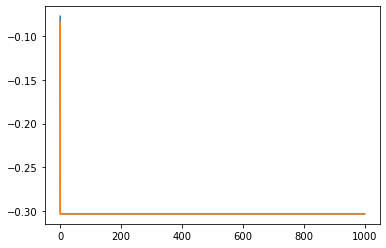

In [87]:
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.plot(cv_results['param_alpha'],cv_results["mean_test_score"])

In [88]:
model_cv.best_estimator_

Lasso(alpha=0.0001)

In [89]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 
lasso.coef_

array([-0.01527171,  0.01770069,  0.07509885,  0.04147797,  0.0288198 ,
        0.00660425, -0.        ,  0.03616584,  0.01279606,  0.01004983,
       -0.0131175 ,  0.06123991,  0.01147571,  0.01420525,  0.01525068,
       -0.02016863,  0.026148  ,  0.01711375,  0.02383216,  0.01800196,
        0.01208706,  0.        ,  0.0430076 ,  0.01982559,  0.02092973,
        0.        ,  0.10576545,  0.04156305,  0.16753873,  0.11943341,
        0.02376169, -0.0219654 ,  0.01399466,  0.01922411,  0.01977178,
        0.        , -0.00578898, -0.02042691, -0.03292257, -0.        ,
       -0.00024077,  0.01114373,  0.02730476,  0.01733523,  0.03753469,
        0.01500745,  0.03267993, -0.0204746 ,  0.02812805,  0.03017765])

In [90]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso.predict(x_test))

0.011978268880819463

In [91]:
# R2 score, RMSE, RSS

from sklearn.metrics import r2_score

y_pred_train= lasso.predict(x_train)
y_pred_test= lasso.predict(x_test)

metric= []
r2_train_lr=r2_score(y_train,y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr=r2_score(y_test,y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)


0.9127905468579834
0.9087440550466425


# Ridge Regression

In [92]:
ridge = Ridge()

folds= 5

model_cv1= GridSearchCV(estimator= ridge, param_grid= params, scoring ="neg_mean_absolute_error" , cv= folds,
                       return_train_score=True,verbose=1)

model_cv1.fit(x_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
model_cv1.best_params_

{'alpha': 3.0}

In [94]:
cv_results1= pd.DataFrame(model_cv1.cv_results_)
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007127,0.003595,0.004457,0.003699,0.0001,{'alpha': 0.0001},-0.085547,-0.085112,-0.076495,-0.084196,...,-0.083971,0.004007,23,-0.077203,-0.074256,-0.078976,-0.077153,-0.077132,-0.076944,0.001517
1,0.008504,0.005503,0.004633,0.003790,0.001,{'alpha': 0.001},-0.085547,-0.085112,-0.076495,-0.084195,...,-0.083971,0.004007,22,-0.077203,-0.074256,-0.078976,-0.077153,-0.077132,-0.076944,0.001517
2,0.005715,0.003155,0.004854,0.002884,0.01,{'alpha': 0.01},-0.085547,-0.085112,-0.076495,-0.084195,...,-0.083970,0.004006,21,-0.077203,-0.074256,-0.078976,-0.077153,-0.077132,-0.076944,0.001517
3,0.008384,0.000458,0.006480,0.003242,0.05,{'alpha': 0.05},-0.085547,-0.085112,-0.076495,-0.084192,...,-0.083966,0.004002,20,-0.077204,-0.074256,-0.078976,-0.077153,-0.077130,-0.076944,0.001516
4,0.008016,0.005082,0.005408,0.004553,0.1,{'alpha': 0.1},-0.085548,-0.085112,-0.076496,-0.084188,...,-0.083961,0.003996,19,-0.077205,-0.074257,-0.078975,-0.077153,-0.077129,-0.076944,0.001516


In [95]:
cv_results1[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
15,3,-0.076981,-0.083764,1
16,4,-0.077010,-0.083784,2
14,2,-0.076959,-0.083801,3
17,5,-0.077048,-0.083805,4
18,6,-0.077090,-0.083825,5
19,7,-0.077130,-0.083844,6
20,8,-0.077167,-0.083861,7
21,9,-0.077204,-0.083876,8
13,1,-0.076949,-0.083879,9
12,0.9,-0.076949,-0.083887,10


In [96]:
cv_results1["param_alpha"] = cv_results1["param_alpha"].astype('float')

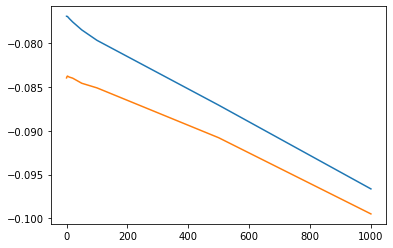

In [97]:
plt.plot(cv_results1["param_alpha"],cv_results1["mean_train_score"])
plt.plot(cv_results1['param_alpha'],cv_results1["mean_test_score"])

In [98]:
model_cv1.best_estimator_

Ridge(alpha=3.0)

In [99]:
alpha = 3.0

ridge = Ridge(alpha=alpha)
        
ridge.fit(x_train, y_train) 
ridge.coef_

array([-1.53622540e-02,  1.77165084e-02,  7.53894164e-02,  4.17412984e-02,
        2.97865308e-02,  7.09778151e-03,  1.00673315e-03,  3.52257923e-02,
        2.67109053e-02,  2.56840934e-02, -1.28161516e-02,  4.26195988e-02,
        1.18287771e-02,  1.51152309e-02,  1.59655575e-02, -2.01792363e-02,
        2.60451558e-02,  1.72364633e-02,  2.40442151e-02,  1.75020833e-02,
        1.21557875e-02,  0.00000000e+00,  4.26286283e-02,  1.98727643e-02,
        2.10145042e-02,  0.00000000e+00,  9.76226167e-02,  3.81999848e-02,
        1.52672552e-01,  1.06779411e-01,  2.38189281e-02, -2.18225953e-02,
        1.41108650e-02,  1.92772390e-02,  1.97870903e-02,  7.99340328e-31,
       -3.01295219e-03, -2.21856001e-02, -3.29385460e-02, -3.19736131e-30,
       -3.01295219e-03,  1.29007469e-02,  2.75050156e-02,  1.77096345e-02,
        3.80328728e-02,  1.49818643e-02,  3.27070291e-02, -2.02002719e-02,
        2.86370431e-02,  3.06301011e-02])

In [100]:
mean_squared_error(y_test, ridge.predict(x_test))

0.012003265763343745

In [101]:

y_pred_train= ridge.predict(x_train)
y_pred_test= ridge.predict(x_test)

metric1= []
r2_train_lr1=r2_score(y_train,y_pred_train)
print(r2_train_lr1)
metric1.append(r2_train_lr1)

r2_test_lr1=r2_score(y_test,y_pred_test)
print(r2_test_lr1)
metric1.append(r2_test_lr1)

0.9126740519262084
0.9085536173332852


In [102]:
ridge_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,MSSubClass,-0.0154
1,LotArea,0.0177
2,OverallQual,0.0754
3,OverallCond,0.0417
4,BsmtFinSF1,0.0298
5,BsmtFinSF2,0.0071
6,BsmtUnfSF,0.0010
7,TotalBsmtSF,0.0352
8,1stFlrSF,0.0267
9,2ndFlrSF,0.0257


In [103]:
lasso_df = pd.DataFrame({'Features':x_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0153
1,LotArea,0.0177
2,OverallQual,0.0751
3,OverallCond,0.0415
4,BsmtFinSF1,0.0288
5,BsmtFinSF2,0.0066
6,TotalBsmtSF,0.0362
7,1stFlrSF,0.0128
8,2ndFlrSF,0.0100
9,LowQualFinSF,-0.0131


# Conclusion

Alpha of Lasso regression : .0001

Alpha of Ridge regression : 3.0



R2 score of Lasso regression:Train-0.9127  Test- 0.9087

R2 score of Ridge regression:Train- 0.9126  Test-0.9085



Lasso regression performed slightly better than Ridge regression

